In [1]:
import os
import sys

path = os.path.abspath('')
print(path)
sys.path.append('../')

# os.path.dirname( __file__ )
sys.path.pop() 
sys.path.append(os.path.abspath(os.path.join(path, '../..')))

from copy import deepcopy

import numpy as np
import torch

from epde.preprocessing.smoothers import ANNSmoother

/home/maslyaev/Documents/EPDE/projects/control


In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
XX, YY = np.meshgrid(x, y)
u = np.sin(XX+YY)

In [3]:
import matplotlib.pyplot as plt
from epde.preprocessing.deriv_calculators import Heatmap

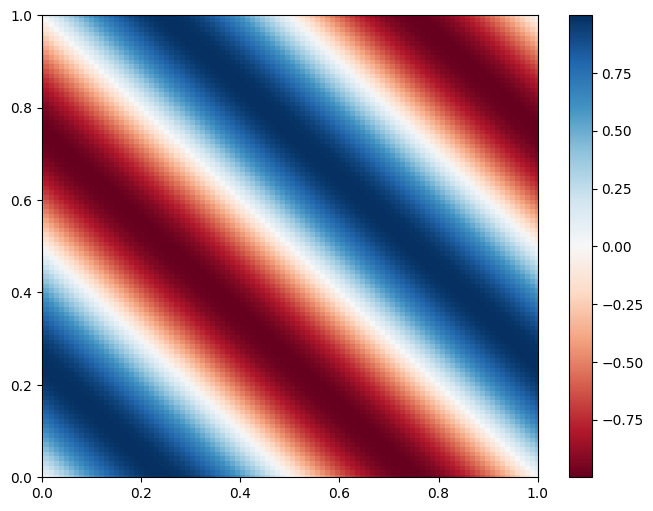

In [4]:
Heatmap(u)

In [5]:
smoother = ANNSmoother()
res = smoother(data = u, grid = [XX, YY], epochs_max=5*1e3, return_ann = True)

Surface training t=0, loss=0.6415121555328369
Surface training t=1, loss=0.6357569396495819
Surface training t=2, loss=0.6335617005825043
Surface training t=3, loss=0.6334584057331085
Surface training t=4, loss=0.6329585611820221
Surface training t=5, loss=0.6316051483154297
Surface training t=6, loss=0.6300407946109772
Surface training t=7, loss=0.6285621225833893
Surface training t=8, loss=0.6274833679199219
Surface training t=9, loss=0.6264312565326691
Surface training t=10, loss=0.6250126659870148
Surface training t=11, loss=0.6233843564987183
Surface training t=12, loss=0.6217712461948395
Surface training t=13, loss=0.620235949754715
Surface training t=14, loss=0.6185199618339539
Surface training t=15, loss=0.616519570350647
Surface training t=16, loss=0.6145164668560028
Surface training t=17, loss=0.6124167442321777
Surface training t=18, loss=0.6102434694766998
Surface training t=19, loss=0.6078188419342041
Surface training t=20, loss=0.6053404808044434
Surface training t=21, lo

/home/maslyaev/Documents/EPDE/epde/preprocessing/smoothers.py:99: UserWarning: Returning ANN from smoother. This should not occur anywhere, except selected experiments.
  warn('Returning ANN from smoother. This should not occur anywhere, except selected experiments.')


In [7]:
grid = [XX, YY]
tgrid = torch.from_numpy(np.array([subgrid.reshape(-1) for subgrid in grid])).float().T

In [8]:
op_vals = res[1](tgrid)[..., 0]
op_vals.shape

torch.Size([10000])

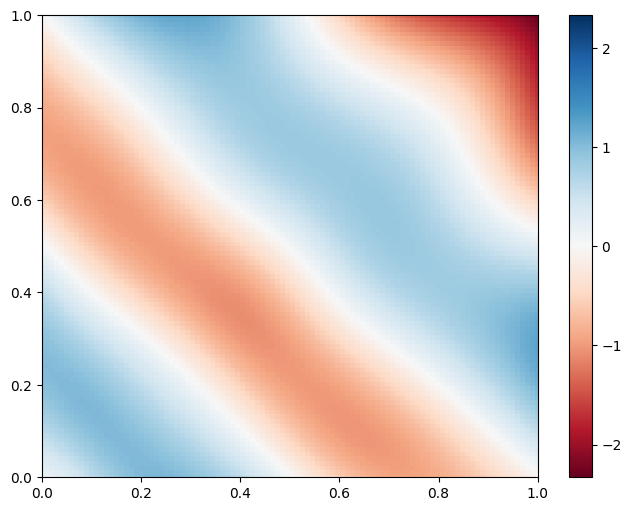

In [9]:
Heatmap(op_vals.detach().numpy().reshape(XX.shape))

In [14]:
tgrid.requires_grad = True
op_vals = res[1](tgrid)[..., 0].sum(0)
op_vals_dot = torch.autograd.grad(outputs = op_vals, inputs = tgrid)

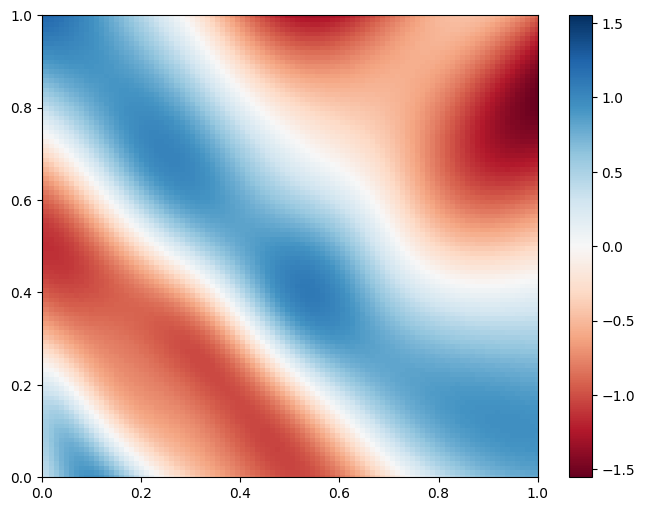

In [19]:
Heatmap(op_vals_dot[0].detach().numpy()[:, 0].reshape((100, 100)))